In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import re


import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r"C:\Users\abipa\Desktop\mobile price predictor\Flipkart.csv")
df.head()

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Warranty,Price
0,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",4.4,"1,26,250 Ratings","7,344 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,NaN,"₹9,699"
1,"POCO C50 (Country Green, 32 GB)",4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",NaN,"₹5,749"
2,"POCO C50 (Royal Blue, 32 GB)",4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",NaN,"₹5,749"
3,"REDMI 10 (Caribbean Green, 64 GB)",4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,NaN,"₹9,299"
4,"REDMI 10 (Pacific Blue, 64 GB)",4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,NaN,"₹9,299"


In [5]:
# Creating a copy of the Dataframe so that we don't accidently make changes to the real data
df_copy = df.copy()

In [7]:
# Checking for null values
df_copy.isnull().sum()


Model               0
Stars               4
Num_of_Ratings      4
Reviews             4
Ram                 0
Storage             0
Expandable        340
Display             0
Camera              0
Battery             0
Processor          25
Warranty          787
Price               0
dtype: int64

In [11]:
df_copy.drop(columns=["Warranty"],inplace=True)

In [13]:
df_copy['Price'] = df_copy['Price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [15]:
# Extract model name and memory size from model column
model_regex = r'(.*)\((.*)\, (\d+) (?:GB|TB)\)'
df_copy[['Model', 'Color', 'Memory']] = df_copy['Model'].str.extract(model_regex)

# Strip whitespace from color and memory columns
df_copy['Color'] = df_copy['Color'].str.strip()
df_copy['Memory'] = df_copy['Memory'].str.strip()

# Remove last 6 characters (i.e. ' 64 GB)') from Model column
df_copy['Model'] = df_copy['Model'].str.replace(model_regex, r'\1', regex=True)

df_copy

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Price,Color,Memory
0,SAMSUNG Galaxy F13,4.4,"1,26,250 Ratings","7,344 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 5MP + 2MP | 8MP Front Camera,6000 mAh Lithium Ion Battery,Exynos 850 Processor,9699,Waterfall Blue,64
1,POCO C50,4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Country Green,32
2,POCO C50,4.4,"3,204 Ratings",151 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera | 5MP Front Camera,5000 mAh Lithium Polymer Battery,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5749,Royal Blue,32
3,REDMI 10,4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Caribbean Green,64
4,REDMI 10,4.3,"1,93,536 Ratings","12,428 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,9299,Pacific Blue,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,SAMSUNG Galaxy A04e,4.3,19 Ratings,2 Reviews,4 GB RAM,128 GB RO,Expandable Upto 1 TB,16.51 cm (6.5 inch) HD+ Display,13MP + 2MP | 5MP Front Camera,5000 mAh Lithium Ion Battery,Mediatek Helio P35 Processor,11499,Light Blue,128
783,Infinix Hot 11 2022,4.2,"17,231 Ratings","1,402 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02 cm (6.7 inch) Full HD+ Display,13 MP + 2 MP Depth Lens | 8MP Front Camera,5000 mAh Li-ion Polymer Battery,UniSoc T610 Processor,9999,Aurora Green,64
784,APPLE iPhone 14 Plus,4.7,"4,616 Ratings",346 Reviews,512 GB RO,512 GB ROM,NaN,17.02 cm (6.7 inch) Super Retina XDR Display,12MP + 12MP | 12MP Front Camera,"A15 Bionic Chip, 6 Core Processor Processor",1 Year Warranty for Phone and 6 Months Warrant...,109999,Starlight,512
785,REDMI A1,4.3,"4,641 Ratings",230 Reviews,2 GB RAM,32 GB ROM,NaN,16.56 cm (6.52 inch) Display,5MP Rear Camera,5000 mAh Battery,12 months,6599,Light Green,32


In [17]:
df_copy.drop(columns=["Memory"],inplace=True)

In [19]:
df_copy = df_copy[df_copy['Price'] > 2700]

In [21]:
df_copy.shape

(672, 13)

In [23]:
# Rechecking the null values
df_copy.isnull().sum()

Model               8
Stars               3
Num_of_Ratings      3
Reviews             3
Ram                 0
Storage             0
Expandable        282
Display             0
Camera              0
Battery             0
Processor           0
Price               0
Color               8
dtype: int64

In [25]:
# As we can see the Expamdable column has 282 missing values, lets try and fill them
mode_value = df_copy['Expandable'].mode()[0]
df_copy['Expandable'] = df_copy['Expandable'].fillna(mode_value)
df_copy.dropna(inplace=True)
# Iam using the mode value to fill the missing values since the expandable option is pretty generic for most 
# smartphones.

In [27]:
# Checking if the values have been imputed
df_copy.isnull().sum()

Model             0
Stars             0
Num_of_Ratings    0
Reviews           0
Ram               0
Storage           0
Expandable        0
Display           0
Camera            0
Battery           0
Processor         0
Price             0
Color             0
dtype: int64

In [29]:
df_copy['Stars'] = df_copy['Stars'].astype(float)

In [31]:
df_copy['Num_Ratings'] = df_copy['Num_of_Ratings'].str.replace(',', '').str.extract('(\d+)').astype(int)
df_copy['Num_Reviews'] = df_copy['Reviews'].str.replace(',', '').str.extract('(\d+)').astype(int)

# Drop the original columns
df_copy.drop(['Num_of_Ratings', 'Reviews'], axis=1, inplace=True)

In [33]:
df_copy.Ram.unique()

array(['4 GB RAM ', '2 GB RAM ', '128 GB RO', '6 GB RAM ', '64 GB RO',
       '8 GB RAM ', '3 GB RAM ', '12 GB RAM ', '256 GB RO', '4 MB RAM ',
       '512 GB RO'], dtype=object)

In [35]:
# Find the mode of the Ram column
mode_value = df_copy['Ram'].mode()[0]

# Create a list of values to replace
replace_values = ['128 GB RO', '64 GB RO', '256 GB RO', '4 MB RAM ', '512 GB RO']

# Replace the values with the mode value
df_copy['Ram'] = df_copy['Ram'].replace(replace_values, mode_value)

In [37]:
df_copy.Ram.unique()


array(['4 GB RAM ', '2 GB RAM ', '6 GB RAM ', '8 GB RAM ', '3 GB RAM ',
       '12 GB RAM '], dtype=object)

In [39]:
df_copy.Storage.unique()

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '128 GB RO', '256 GB RO',
       '256 GB ROM', '16 GB ROM', '512 GB ROM'], dtype=object)

In [41]:
df_copy.Storage.unique()

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '128 GB RO', '256 GB RO',
       '256 GB ROM', '16 GB ROM', '512 GB ROM'], dtype=object)

In [43]:
df_copy['Storage'] = df_copy['Storage'].str.replace('128 GB RO', '128 GB ROM')
df_copy['Storage'] = df_copy['Storage'].str.replace('256 GB RO', '256 GB ROM')

In [45]:
# Rechecking the values
df_copy.Storage.unique()

# This gave us some more errors as it didnt work as intended...so i had to re run the code with the
# updated typos

array(['64 GB ROM', '32 GB ROM', '128 GB ROMM', '128 GB ROM',
       '256 GB ROM', '256 GB ROMM', '16 GB ROM', '512 GB ROM'],
      dtype=object)

In [47]:
df_copy['Storage'] = df_copy['Storage'].str.replace('128 GB ROMM', '128 GB ROM')
df_copy['Storage'] = df_copy['Storage'].str.replace('256 GB ROMM', '256 GB ROM')

In [49]:
df_copy.Storage.unique()

array(['64 GB ROM', '32 GB ROM', '128 GB ROM', '256 GB ROM', '16 GB ROM',
       '512 GB ROM'], dtype=object)

In [51]:
df_copy.Expandable.unique()

array(['Expandable Upto 1 TB', 'Expandable Upto 512 GB',
       'Expandable Upto 256 GB', ' Expandable Upto 1 TB',
       'Expandable Upto 2 TB', ' Expandable Upto 512 GB',
       ' Expandable Upto 256 GB', ' Expandable Upto 2 TB',
       'Expandable Upto 128 GB'], dtype=object)

In [53]:
df_copy['Expandable'] = df_copy['Expandable'].str.replace(' Expandable Upto 1 TB', 'Expandable Upto 1 TB')
df_copy['Expandable'] = df_copy['Expandable'].str.replace(' Expandable Upto 512 GB', 'Expandable Upto 512 GB')
df_copy['Expandable'] = df_copy['Expandable'].str.replace(' Expandable Upto 256 GB', 'Expandable Upto 256 GB')
df_copy['Expandable'] = df_copy['Expandable'].str.replace(' Expandable Upto 2 TB', 'Expandable Upto 2 TB')

In [55]:
# Rechecking the unique values
df_copy.Expandable.unique()

array(['Expandable Upto 1 TB', 'Expandable Upto 512 GB',
       'Expandable Upto 256 GB', 'Expandable Upto 2 TB',
       'Expandable Upto 128 GB'], dtype=object)

In [57]:
#df_copy.Display.unique()

In [59]:
def extract_display_info(df_copy):
    
    # Extract display size in inches
    try:
        df_copy["display_inches"] = df_copy["Display"].apply(lambda x: float(re.findall(r"\d+\.\d+|\d+(?= inch)", x)[0]))
    except:
        df_copy["display_inches"] = np.nan

In [61]:
extract_display_info(df_copy)

In [63]:
df_copy.display_inches.unique()


array([16.76, 16.56, 17.02, 17.32, 15.49, 16.26, 16.51, 16.94, 16.71,
       16.64, 16.36, 15.6 , 16.74, 16.33, 16.66, 16.59, 17.22, 17.04,
       16.54, 17.53, 17.07, 17.27, 16.97, 12.7 , 16.21, 16.3 , 16.81,
       16.43, 13.84, 16.  , 16.55, 17.65, 15.8 ])

In [65]:
# Dropping the Display column as it is no longer required
df_copy.drop(columns=["Display"],inplace=True)

In [67]:
#df.Camera.unique()

In [69]:
# Since the Camera column has so many values, and the data is cluttered
# we are just extracting the number of cameras from the camera column for simplicity
# Please note that this is the toal number of cameras including the front and the back cameras


def count_cameras(camera_str):
    if "Camera" not in camera_str:
        return 0
    else:
        cameras = camera_str.split("|")[0]
        return len(cameras.split("+"))

df["Num_camera"] = df["Camera"].apply(count_cameras)

In [71]:
df_copy['Num_camera'] = df_copy['Camera'].apply(count_cameras)

In [73]:
df_copy.Num_camera.unique()

array([3, 1, 2, 4, 0], dtype=int64)

In [75]:
df_copy.drop(columns=["Camera"],inplace=True)

In [77]:
#df_copy.Battery.unique()

In [79]:
# Writing a custom function to extract the numerical values for the battery capacity and creating a new column wit it

def extract_battery_info(df_copy):
    # Extract battery capacity in mAh
    try:
        df_copy["battery_mah"] = df_copy["Battery"].apply(lambda x: int(re.findall(r"\d+", x)[0]))
    except:
        df_copy["battery_mah"] = np.nan


In [81]:
extract_battery_info(df_copy)

In [83]:
df_copy.battery_mah.unique()

array([6000, 5000,   15,   13, 4410, 4700, 4310, 4500, 4600, 7000, 4020,
       4980, 4800, 3900, 3020, 5080, 4050, 4000,   14, 5020, 4400, 3100,
       3000, 5200, 4270, 4926, 4230,   16, 3300, 4300, 5160, 4250, 5018,
       5065, 4520, 4610], dtype=int64)

In [85]:
df_copy.battery_mah.mode()

0    5000
Name: battery_mah, dtype: int64

In [87]:
# Replacing the wrong values with the actual values
df_copy['battery_mah'] = df_copy['battery_mah'].replace(13, 4500)
df_copy['battery_mah'] = df_copy['battery_mah'].replace(14, 5000)
df_copy['battery_mah'] = df_copy['battery_mah'].replace(15, 4500)
df_copy['battery_mah'] = df_copy['battery_mah'].replace(16, 4800)

In [89]:
df_copy.battery_mah.unique()

array([6000, 5000, 4500, 4410, 4700, 4310, 4600, 7000, 4020, 4980, 4800,
       3900, 3020, 5080, 4050, 4000, 5020, 4400, 3100, 3000, 5200, 4270,
       4926, 4230, 3300, 4300, 5160, 4250, 5018, 5065, 4520, 4610],
      dtype=int64)

In [91]:
#df_copy.Processor.unique()

In [93]:
df_copy['Processor'].replace(['1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
                              'Brand Warranty of 1 Year',
                              'Brand Warranty for 1 Year',
                              '1 Year Warranty',
                              '12 Months Warranty',
                              '1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES',
                              '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box',
                              '1 Year of Device & 6 Months for In-Box Accessories',
                              '1 Year Manufacturer Warranty for Handset and 6 Months Warranty for In the Box Accessories',
                              '12 months on phone & 6 months on accessories',
                              '12 Months brand Warranty , Domestic Only',
                              'One Time Screen Replacement within 100 days of purchase 1 Year warranty on mobile device & 6 months on accessories',
                              'One Time Screen Replacement within 100 days of purchase, 1 Year warranty on mobile device & 6 months on accessories.',
                              '12 MONTHS', 
                              '12 Months warranty',
                              '12 Months Brand Warranty'], np.nan, inplace=True)

In [95]:
df_copy['Processor'].replace(['12 months',
                              '12 Months',
                              'One Time Screen Replacement within 100 days of purchase 1 Year warranty on mobile device &  6 months on accessories',
                              'One Time Screen Replacement within 100 days of purchase, 1 Year warranty on mobile device &  6 months on accessories.',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories',
                              '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories',
                              '1 Year for Handset and 6 Months for Inbox Accessories',
                              '" 1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase"',
                              '1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase',
                              '12Months Brand Warranty',
                              '1 Year  Manufacturer Warranty',
                              '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In-Box Accessories',
                              '1 Year warranty on mobile device &  6 months on accessories.',
                              '1 year manufacturing warranty for mobile and 6 months for box accessories',
                              '1 Year',
                              ], np.nan, inplace=True)

In [97]:
df_copy.Processor.unique()

array(['Exynos 850 Processor',
       'Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Qualcomm Snapdragon 680 Processor', 'MediaTek G37 Processor', nan,
       'Qualcomm Snapdragon 750G Processor',
       'Mediatek Dimensity 810 Processor', 'Mediatek Helio G85 Processor',
       'Unisoc T606 Processor', 'Meditek Helio G37 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Mediatek Dimensity 700 Processor', 'Mediatek Helio A22 Processor',
       'Unisoc Spreadtrum SC9863A1 Processor',
       'Mediatek Helio G37 Processor', 'Mediatek Helio P35 Processor',
       'UNISOC T700 Processor', 'Google Tensor Processor',
       'Unisoc Tiger T616 Processor', 'Unisoc T612 Processor',
       'Unisoc T616 Processor', 'Mediatek Helio G95 Processor',
       'Mediatek Helio G96 Processor', 'Mediatek Helio G35 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'Mediatek Helio G99 Processor', 'Dimensity 810 Processor',
       'MediaTek Helio G35 Processor',
 

In [99]:
df_copy.shape

(661, 14)

In [101]:
# Dropping all the observations for the i-phones as the processor information was not accurate
df_copy.drop(df_copy[df_copy['Model'].str.contains('apple', case=False)].index, inplace=True)

In [103]:
df_copy.shape

(617, 14)

In [105]:
def add_processor_name_column(df):
    # Extract the string values before "Processor" in the "Product_Name" column
    processor_names = df["Processor"].str.extract(r"^(.+)\sProcessor")

    # Add the "Processor_name" column to the DataFrame with the extracted values
    df["Processor_name"] = processor_names

In [107]:
add_processor_name_column(df_copy)

In [109]:
df_copy.Processor_name.isnull().sum()

112

In [111]:
# calculate the mode value of Processor_name
mode_value = df_copy['Processor_name'].mode()[0]

# fill missing values with mode
df_copy['Processor_name'].fillna(mode_value, inplace=True)

In [113]:
df_copy.isnull().sum()

Model               0
Stars               0
Ram                 0
Storage             0
Expandable          0
Battery             0
Processor         111
Price               0
Color               0
Num_Ratings         0
Num_Reviews         0
display_inches      0
Num_camera          0
battery_mah         0
Processor_name      0
dtype: int64

In [115]:
df_copy.drop(columns=['Battery','Processor'],inplace=True)

In [117]:
# Changing the order of the columns for better understanding

df_copy = df_copy[['Model', 'Color', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'Expandable', 'Processor_name', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]

In [119]:
df_copy.reset_index(inplace=True)

In [121]:
df_copy.columns

Index(['index', 'Model', 'Color', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram',
       'Storage', 'Expandable', 'Processor_name', 'display_inches',
       'Num_camera', 'battery_mah', 'Price'],
      dtype='object')

In [123]:
df_copy.drop(columns=['index'],inplace=True)

In [125]:
# create a function to map processor names to categories
def map_processor_name(name):
    if "mediatek" in name.lower():
        return "Mediatek processor"
    elif "qualcomm" in name.lower():
        return "Qualcomm processor"
    elif "unisoc" in name.lower():
        return "Unisoc processor"
    elif "exynos" in name.lower():
        return "Exynos processor"
    elif "tensor" in name.lower():
        return "Google Tensor processor"
    elif "helio" in name.lower():
        return "Helio processor"
    else:
        return "Other processor"

# apply the function to the processor_name column
df_copy['processor_category'] = df_copy['Processor_name'].apply(map_processor_name)

In [127]:
# Dropping the Processor column as it is no longer required
df_copy.drop("Processor_name",axis=1,inplace=True)


In [129]:
df_copy.processor_category.unique()

array(['Exynos processor', 'Mediatek processor', 'Qualcomm processor',
       'Unisoc processor', 'Helio processor', 'Google Tensor processor',
       'Other processor'], dtype=object)

In [131]:
df_copy.Color.unique()

array(['Waterfall Blue', 'Country Green', 'Royal Blue', 'Caribbean Green',
       'Pacific Blue', 'Nightsky Green', 'Midnight Black', 'Aurora Green',
       'Racing Black', 'Fantasy Purple', 'Luna Blue', 'Sunrise Copper',
       'Forest Green', 'Shadow Black', 'Aqua Blue', 'Yellow',
       'Charcoal Grey', 'Baby Blue', 'Copper Blush', 'Metallic White',
       'Sunrise Orange', 'Creamy White', 'Exploratory Blue', '7° Purple',
       'Meteorite Grey', 'Alpine White', 'Laser Blue', 'Power Black',
       'Frosted Blue', 'Force Black', 'Origin Blue', 'Aqua Sky',
       'Night Black', 'Azure Blue', 'Mineral Gray', 'Cosmic Black',
       'Satin Silver', 'Midnight Gray', 'Turquoise Cyan', 'Polar Black',
       'Laser Black', 'Jade Purple', 'Cool Blue', 'Carbon Gray',
       'Metaverse Blue', 'Opal Green', 'Starry Sky', 'Midnight Galaxy',
       'Chalk', 'Glowing Black', 'Denim Black', 'Electric Blue',
       'Space Blue', 'Gravity Black', 'Glowing Green', 'Deep Ocean Blue',
       'Mystique Gr

In [133]:
# Grouping the colours into categories for simplicity

# Define the group_colors() function
def group_colors(color):
    if "blue" in color.lower() or "cyan" in color.lower():
        return "Blue"
    elif "green" in color.lower():
        return "Green"
    elif "black" in color.lower() or "charcoal" in color.lower() or "obsidian" in color.lower():
        return "Black"
    elif "yellow" in color.lower() or "gold" in color.lower():
        return "Yellow"
    elif "grey" in color.lower():
        return "Grey"
    elif "white" in color.lower():
        return "White"
    elif "orange" in color.lower():
        return "Orange"
    elif "silver" in color.lower() or "diamond" in color.lower():
        return "Silver"
    elif "red" in color.lower() or "pink" in color.lower():
        return "Red"
    elif "brown" in color.lower():
        return "Brown"
    else:
        return "Other"

In [135]:
# Apply the group_colors() function on the "color" column
df_copy["color_group"] = df_copy["Color"].apply(group_colors)

In [137]:
df_copy

,Model,Color,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,display_inches,Num_camera,battery_mah,Price,processor_category,color_group
0,SAMSUNG Galaxy F13,Waterfall Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76,3,6000,9699,Exynos processor,Blue
1,POCO C50,Country Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Green
2,POCO C50,Royal Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Blue
3,REDMI 10,Caribbean Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Green
4,REDMI 10,Pacific Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG Galaxy S22 Plus 5G,Phantom Black,4.5,2427,270,8 GB RAM,128 GB ROM,Expandable Upto 1 TB,16.76,3,4500,59999,Qualcomm processor,Black
613,I Kall Z5,Blue,3.0,1760,132,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,13.84,1,3000,4699,Qualcomm processor,Blue
614,SAMSUNG Galaxy A04e,Light Blue,4.3,19,2,4 GB RAM,128 GB ROM,Expandable Upto 1 TB,16.51,2,5000,11499,Mediatek processor,Blue
615,Infinix Hot 11 2022,Aurora Green,4.2,17231,1402,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,5000,9999,Unisoc processor,Green


In [139]:
# Dropping the Color column as it is not required
df_copy.drop("Color",axis=1,inplace=True)


In [141]:
df_copy.color_group.unique()

array(['Blue', 'Green', 'Black', 'Other', 'Yellow', 'White', 'Orange',
       'Grey', 'Silver', 'Brown', 'Red'], dtype=object)

In [143]:
df_copy

,Model,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,display_inches,Num_camera,battery_mah,Price,processor_category,color_group
0,SAMSUNG Galaxy F13,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76,3,6000,9699,Exynos processor,Blue
1,POCO C50,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Green
2,POCO C50,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.56,1,5000,5749,Mediatek processor,Blue
3,REDMI 10,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Green
4,REDMI 10,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,6000,9299,Qualcomm processor,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG Galaxy S22 Plus 5G,4.5,2427,270,8 GB RAM,128 GB ROM,Expandable Upto 1 TB,16.76,3,4500,59999,Qualcomm processor,Black
613,I Kall Z5,3.0,1760,132,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,13.84,1,3000,4699,Qualcomm processor,Blue
614,SAMSUNG Galaxy A04e,4.3,19,2,4 GB RAM,128 GB ROM,Expandable Upto 1 TB,16.51,2,5000,11499,Mediatek processor,Blue
615,Infinix Hot 11 2022,4.2,17231,1402,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,17.02,2,5000,9999,Unisoc processor,Green


In [145]:
df_copy.Model.unique()

array(['SAMSUNG Galaxy F13 ', 'POCO C50 ', 'REDMI 10 ',
       'Infinix HOT 20 Play ', 'SAMSUNG Galaxy F23 5G ',
       'POCO M4 Pro 5G ', 'MOTOROLA g52 ', 'MOTOROLA g31 ',
       'MOTOROLA e13 ', 'Infinix Hot 12 ', 'Infinix NOTE 12i ',
       'POCO X4 Pro 5G ', 'POCO M4 5G ', 'MOTOROLA G62 5G ',
       'Infinix Smart 6 HD ', 'Infinix SMART 7 ', 'MOTOROLA G32 ',
       'MOTOROLA g22 ', 'SAMSUNG Galaxy F04 ', 'MOTOROLA e40 ',
       'vivo T1 44W ', 'Google Pixel 6a ', 'realme C35 ',
       'Realme C30 - Locked with Airtel Prepaid ', 'Infinix Hot 12 Pro ',
       'vivo T1X ', 'SAMSUNG Galaxy M33 5G ', 'REDMI Note 10S ',
       'POCO M4 Pro ', 'MOTOROLA g82 5G ', 'OPPO A17 ', 'POCO X5 Pro 5G ',
       'MOTOROLA g72 ', 'OPPO A17k ', 'Infinix Hot 20 5G ', 'REDMI 10A ',
       'POCO C31 ', 'realme C33 ', 'realme C30 ', 'vivo T1 Pro 5G ',
       'REDMI 9i Sport ', 'REDMI A1 ', 'MOTOROLA e32 ',
       'OnePlus Nord CE 2 Lite 5G ', 'realme 9i 5G ',
       'SAMSUNG Galaxy M04 ', 'Infinix Zero 5G

In [147]:
# use regex to split the first word in the Model column and create two new columns
df_copy[['Company', 'model_name']] = df_copy['Model'].str.extract('^(\S+)\s(.+)$')

In [149]:
df_copy.Company.unique()

array(['SAMSUNG', 'POCO', 'REDMI', 'Infinix', 'MOTOROLA', 'vivo',
       'Google', 'realme', 'Realme', 'OPPO', 'OnePlus', 'Nothing',
       'Micromax', 'Tecno', 'IQOO', 'Redmi', 'I', 'itel', 'Motorola',
       'oppo', 'LAVA', 'Nokia', 'ASUS', 'Xiaomi', 'Mi'], dtype=object)

In [151]:
df_copy.Company.replace({'I':'Infinix'},inplace=True)

In [153]:
# Dropping the Model column as it is no longer required
df_copy.drop(columns=["Model"],inplace=True)

In [155]:
# Changing the order of the columns after making the changes

df_copy = df_copy[["Company",'model_name', 'color_group', 'Stars', 'Num_Ratings', 'Num_Reviews', 'Ram', 'Storage', 'Expandable', 'processor_category', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]

In [157]:
pd.set_option("display.max_rows",10)

In [159]:
df_copy

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG,Galaxy S22 Plus 5G,Black,4.5,2427,270,8 GB RAM,128 GB ROM,Expandable Upto 1 TB,Qualcomm processor,16.76,3,4500,59999
613,Infinix,Kall Z5,Blue,3.0,1760,132,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,Qualcomm processor,13.84,1,3000,4699
614,SAMSUNG,Galaxy A04e,Blue,4.3,19,2,4 GB RAM,128 GB ROM,Expandable Upto 1 TB,Mediatek processor,16.51,2,5000,11499
615,Infinix,Hot 11 2022,Green,4.2,17231,1402,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Unisoc processor,17.02,2,5000,9999


In [161]:
df_copy.to_csv('mobile_df.csv', index=False)

In [1]:
# Importing the Basic Libraries

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading in the Data
mobile_df = pd.read_csv(r"mobile_df.csv")
mobile_df.head()

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299


In [7]:
# Checking the Datatypes of the columns
mobile_df.dtypes

Company                object
model_name             object
color_group            object
Stars                 float64
Num_Ratings             int64
Num_Reviews             int64
Ram                    object
Storage                object
Expandable             object
processor_category     object
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [9]:
# Statistical description of the Dataset
mobile_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Stars,617.0,4.265478,0.174022,3.0,4.20,4.30,4.40,4.70
Num_Ratings,617.0,36719.580227,71283.367902,9.0,1060.00,5167.00,39024.00,577732.00
Num_Reviews,617.0,2630.980551,4882.498096,1.0,74.00,473.00,3336.00,33897.00
display_inches,617.0,16.630908,0.531809,12.7,16.51,16.71,16.76,17.65
Num_camera,617.0,2.246353,0.998826,0.0,1.00,2.00,3.00,4.00
battery_mah,617.0,4992.724473,487.687056,3000.0,5000.00,5000.00,5000.00,7000.00
Price,617.0,16532.406807,12034.372387,4699.0,9499.00,13895.00,17999.00,94999.00


In [11]:
# Checknig fir the null values
mobile_df.isnull().sum()

Company               0
model_name            0
color_group           0
Stars                 0
Num_Ratings           0
Num_Reviews           0
Ram                   0
Storage               0
Expandable            0
processor_category    0
display_inches        0
Num_camera            0
battery_mah           0
Price                 0
dtype: int64

In [13]:
# Replacing the repeated typo errors
mobile_df.Company.replace({"realme":"Realme","Redmi":"REDMI","Motorola":"MOTOROLA","oppo":"OPPO"},inplace=True)

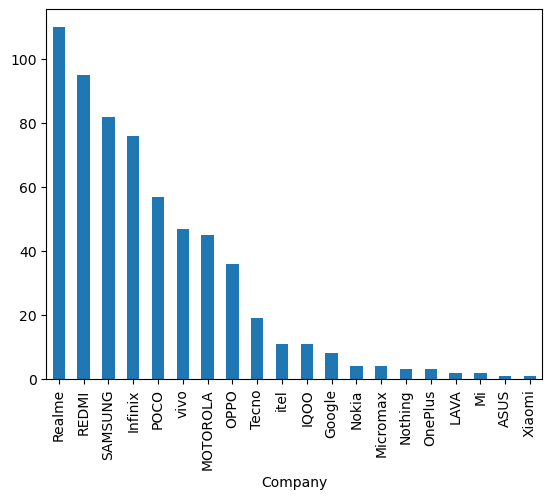

In [15]:
# Barplot of the company variable

mobile_df.Company.value_counts().plot(kind="bar");

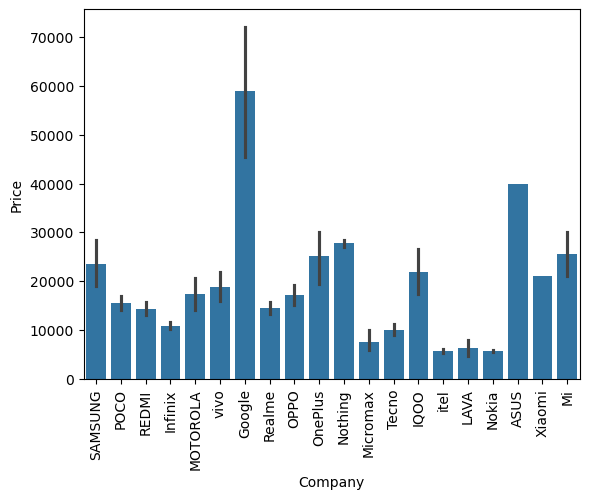

In [17]:
# Since price is the target variable lets take a look at the distribution of Price for each of the companies

sns.barplot(x="Company",y="Price",data=mobile_df)
plt.xticks(rotation='vertical')
plt.show();

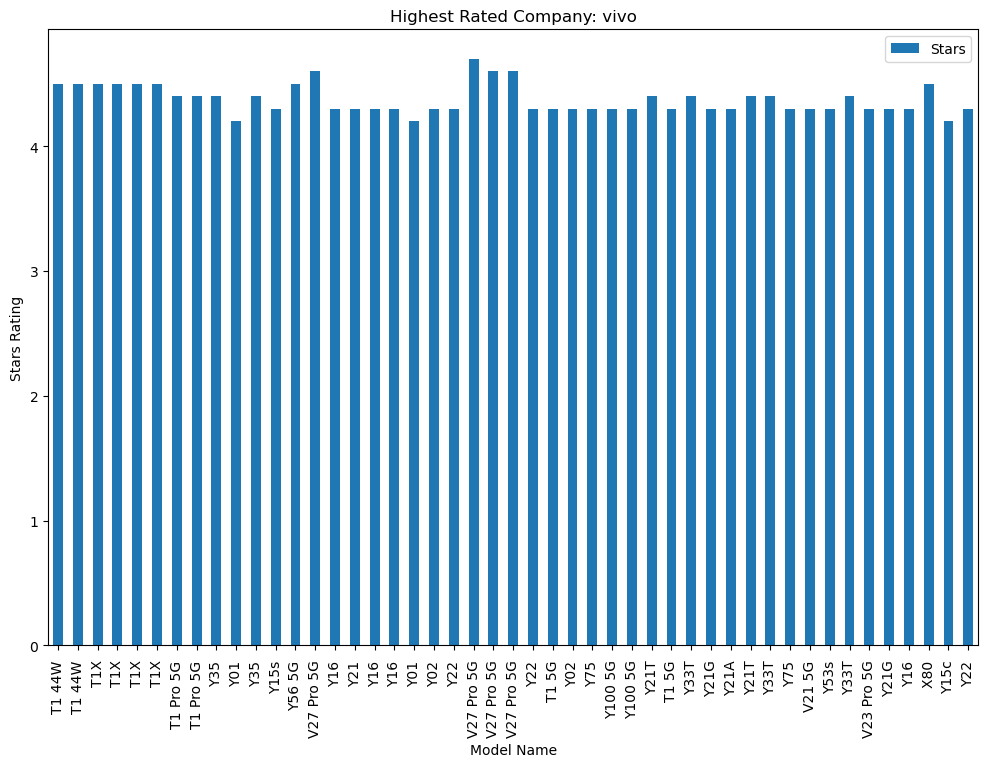

In [19]:
# Since this Data is Scraped from an E-commerce website lets find the highest rated 
# model for a the different companies out of all the models


company_ratings = mobile_df.groupby("Company")["Stars"].max()

company_ratings = company_ratings.sort_values(ascending=False)

top_company = company_ratings.index[0]

filtered_df = mobile_df[mobile_df["Company"] == top_company]

fig, ax = plt.subplots(figsize=(12, 8))
filtered_df.plot.bar(x="model_name", y="Stars", ax=ax, rot=90)
ax.set_xlabel("Model Name")
ax.set_ylabel("Stars Rating")
ax.set_title(f"Highest Rated Company: {top_company}")
plt.show()


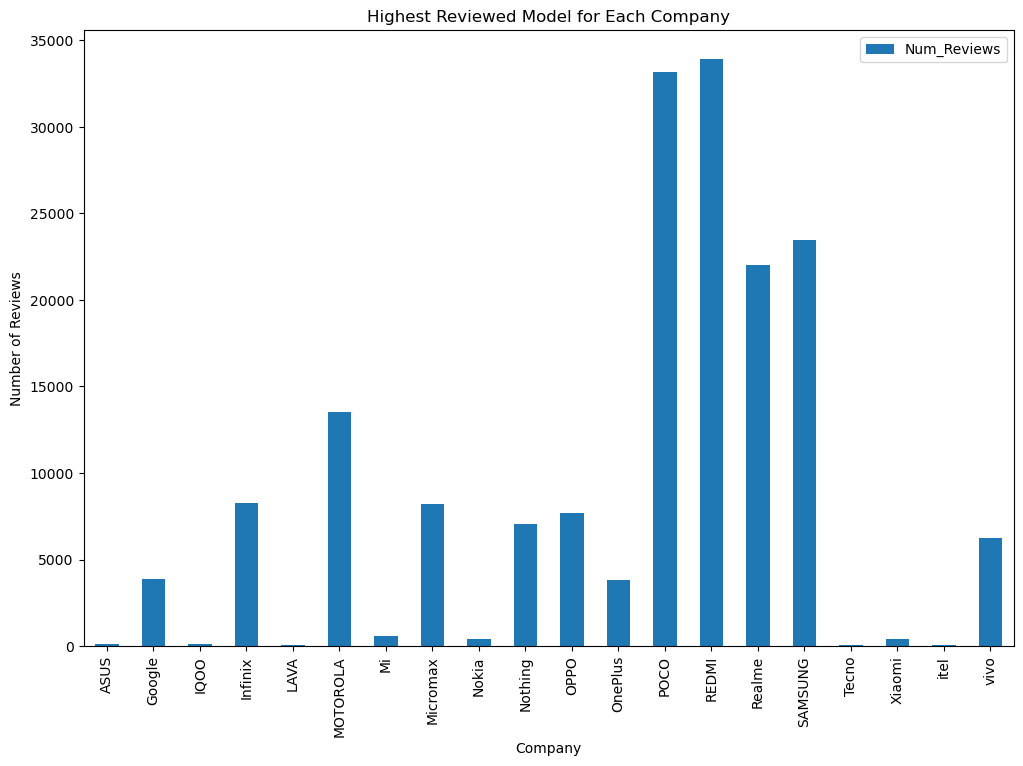

In [21]:
# Seeing the highest review for each Company


grouped_df = mobile_df.groupby("Company")
highest_reviewed_models = grouped_df.apply(lambda x: x.sort_values("Num_Reviews", ascending=False).iloc[0])
highest_reviewed_df = pd.DataFrame(highest_reviewed_models)

fig, ax = plt.subplots(figsize=(12, 8))
highest_reviewed_df.plot.bar(x="Company", y="Num_Reviews", ax=ax)
ax.set_xlabel("Company")
ax.set_ylabel("Number of Reviews")
ax.set_title("Highest Reviewed Model for Each Company")
plt.show()

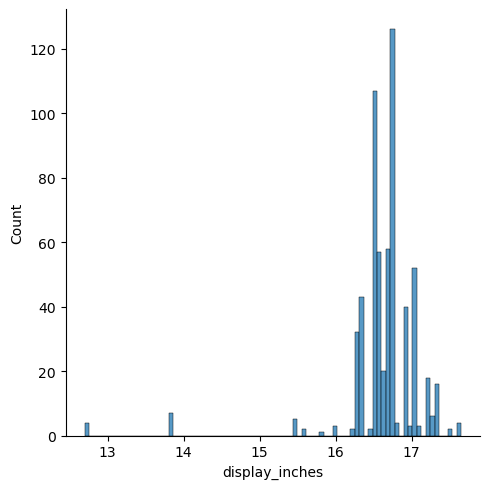

In [23]:
# Lets take a look at the Display size across different models

sns.displot(mobile_df.display_inches);

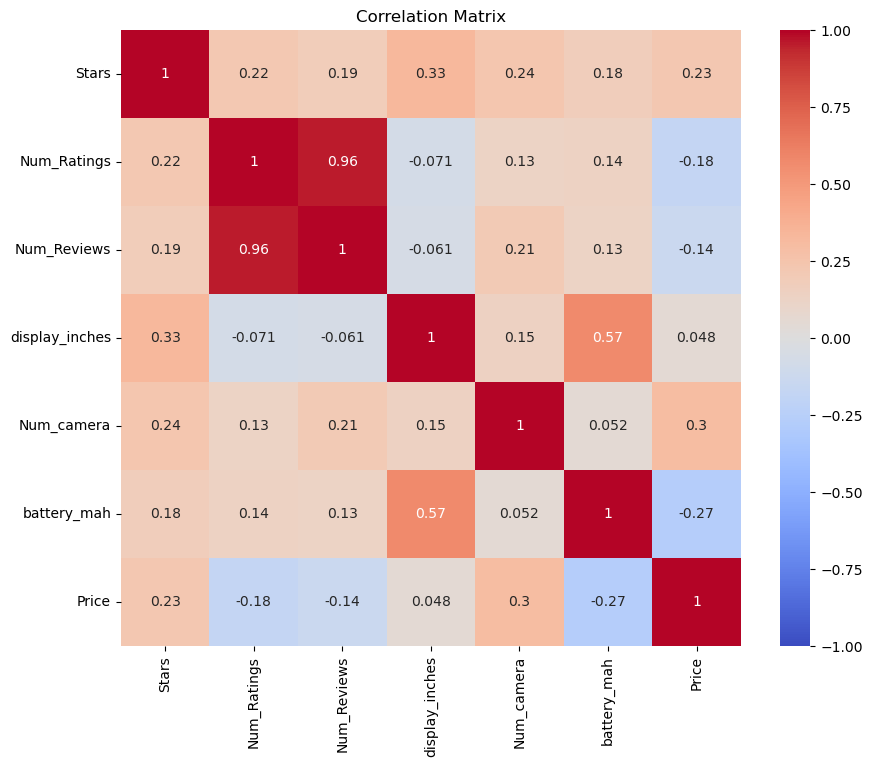

In [27]:
corr_df = mobile_df[['Stars', 'Num_Ratings', 'Num_Reviews', 'display_inches', 'Num_camera', 'battery_mah', 'Price']]
corr_matrix = corr_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

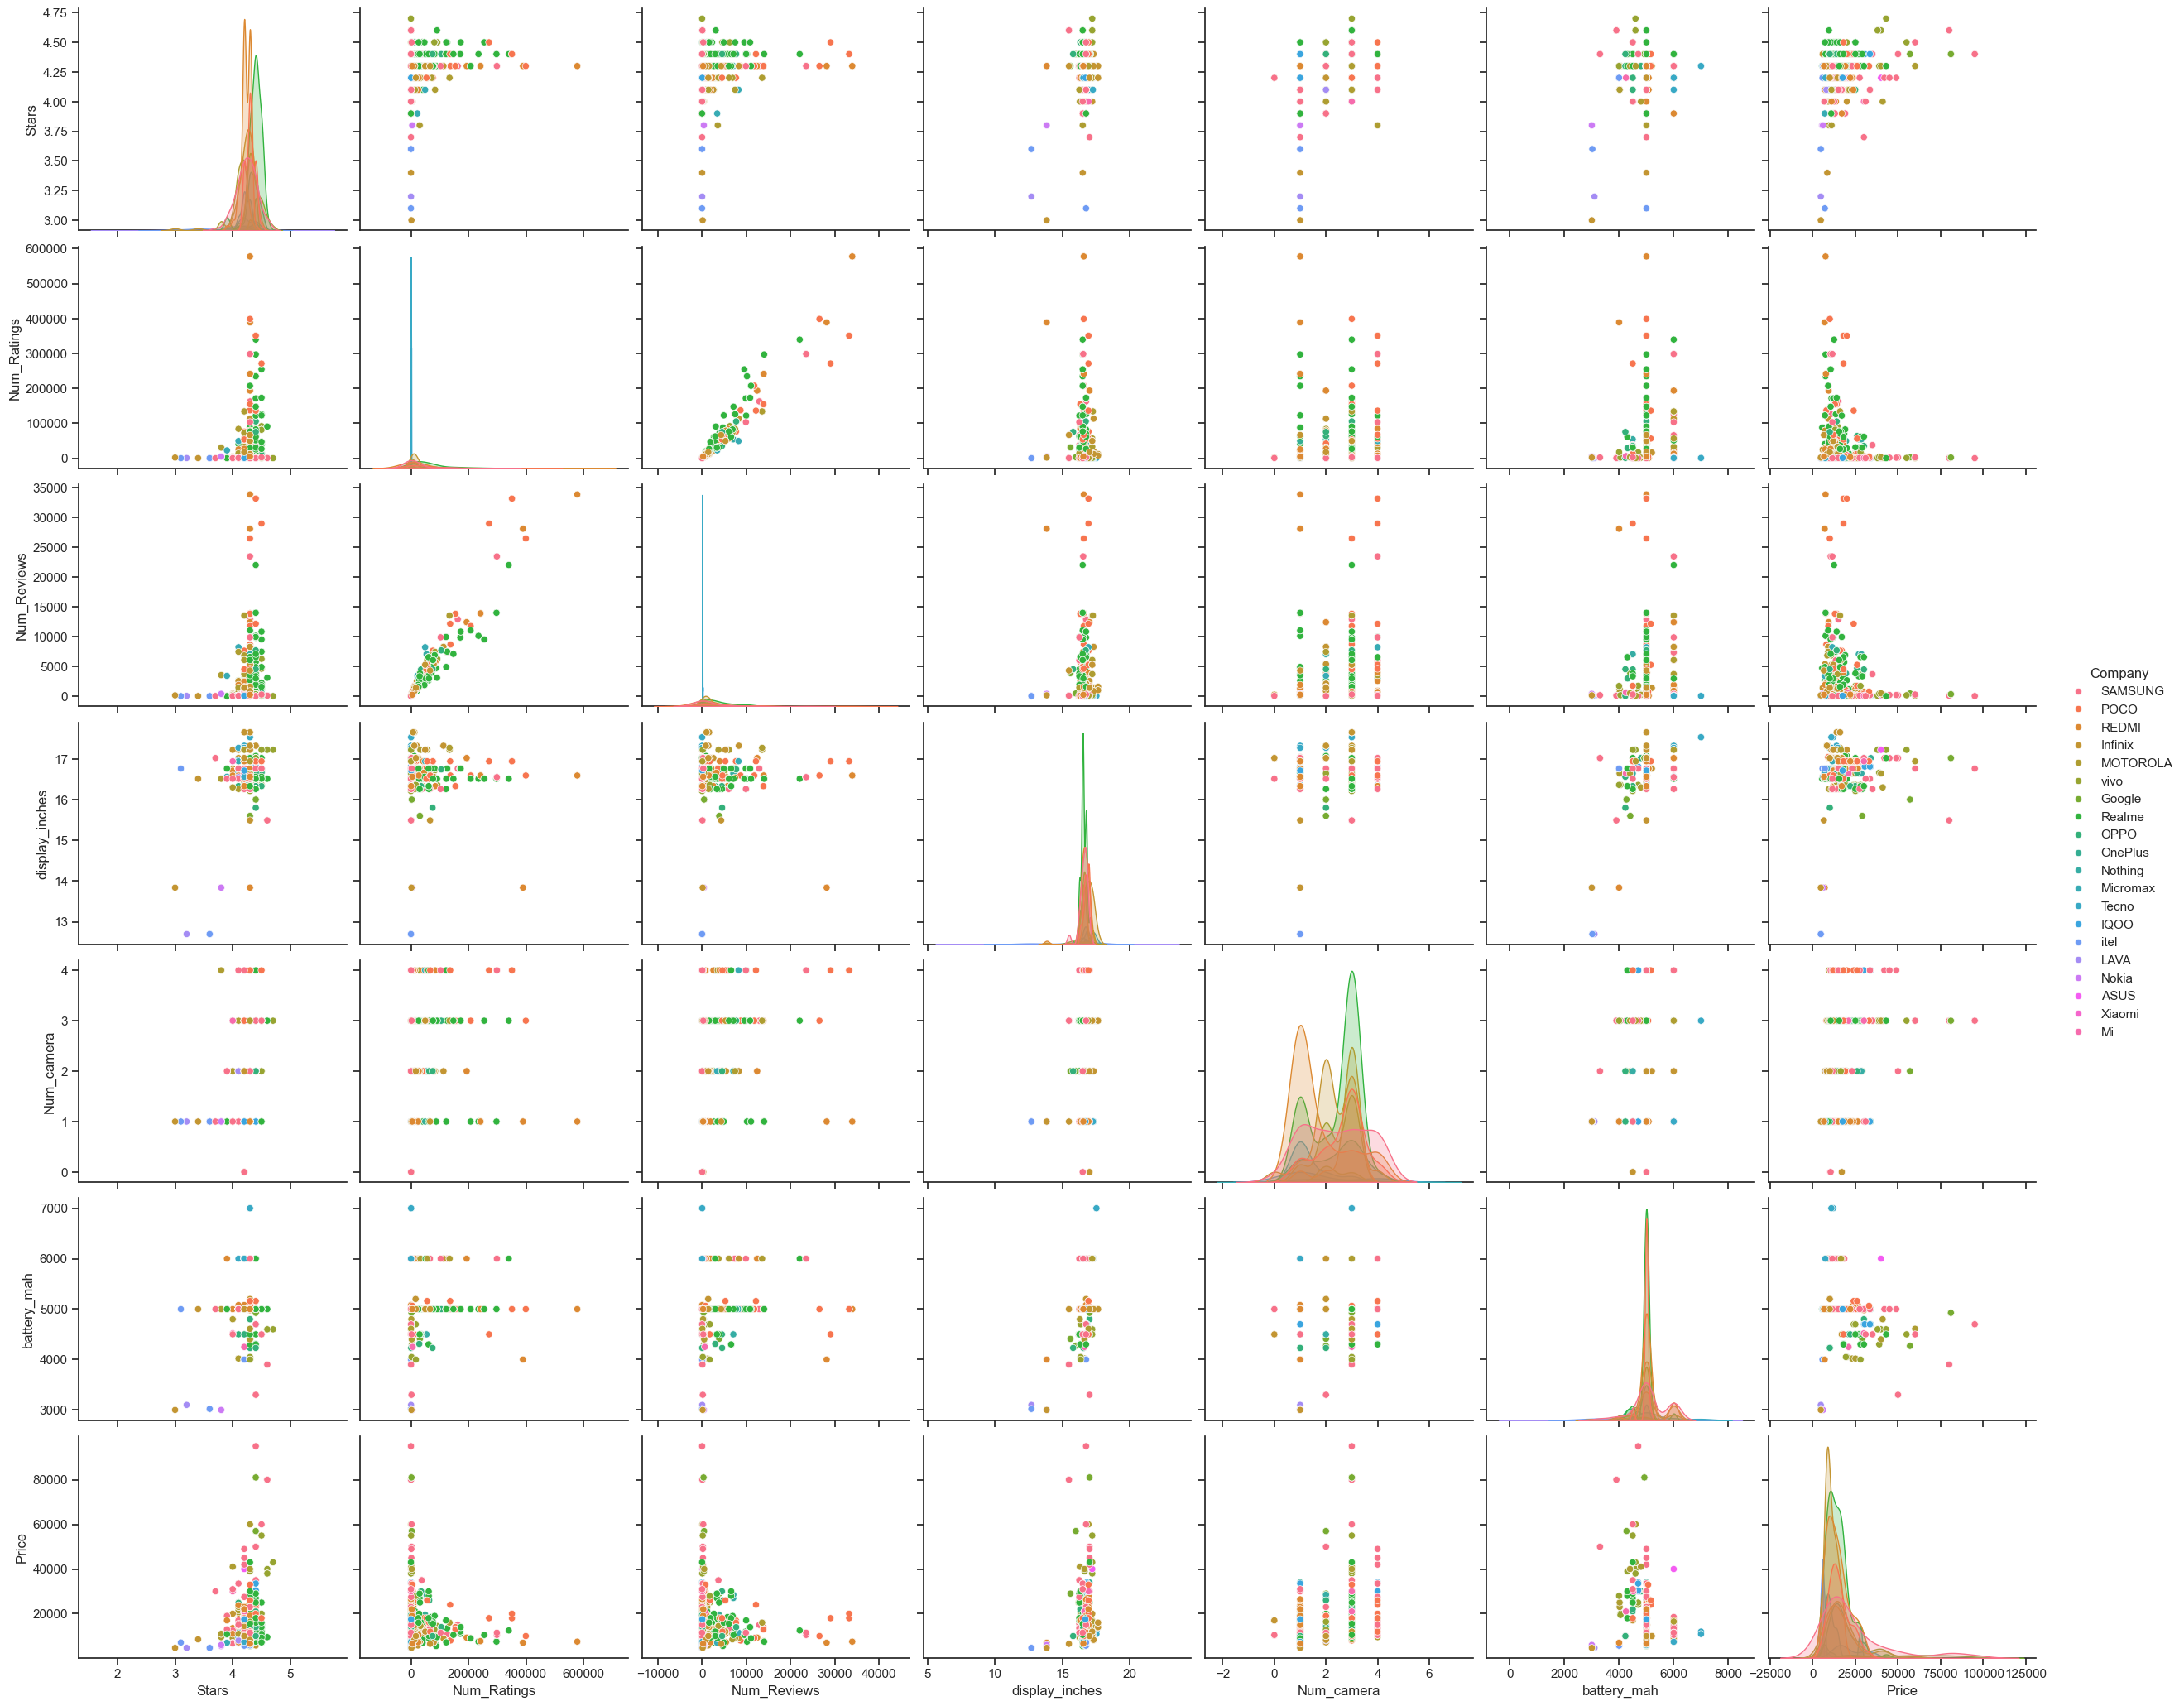

In [29]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(mobile_df, hue="Company", diag_kind="kde", height=3, aspect=1.2)

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# importing the required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For transforming the Columns (with arguments)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Using the OneHotEncoder as only specific columns need to be encoded
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# For Scaling the Data
from sklearn.preprocessing import StandardScaler

# Evaluation metrics for Linear Regression Algorithms
from sklearn.metrics import r2_score,mean_squared_error

#Importing the models required
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb

In [9]:
# Reading in the data

mobile_df = pd.read_csv(r"mobile_df.csv")
mobile_df

,Company,model_name,color_group,Stars,Num_Ratings,Num_Reviews,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Galaxy F13,Blue,4.4,126250,7344,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,C50,Green,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,C50,Blue,4.4,3204,151,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,10,Green,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,10,Blue,4.3,193536,12428,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG,Galaxy S22 Plus 5G,Black,4.5,2427,270,8 GB RAM,128 GB ROM,Expandable Upto 1 TB,Qualcomm processor,16.76,3,4500,59999
613,Infinix,Kall Z5,Blue,3.0,1760,132,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,Qualcomm processor,13.84,1,3000,4699
614,SAMSUNG,Galaxy A04e,Blue,4.3,19,2,4 GB RAM,128 GB ROM,Expandable Upto 1 TB,Mediatek processor,16.51,2,5000,11499
615,Infinix,Hot 11 2022,Green,4.2,17231,1402,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Unisoc processor,17.02,2,5000,9999


In [35]:
# Checking the Datatypes of the columns
mobile_df.dtypes

Company                object
model_name             object
color_group            object
Stars                 float64
Num_Ratings             int64
Num_Reviews             int64
Ram                    object
Storage                object
Expandable             object
processor_category     object
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [37]:
# Replacing the repeated typo errors
mobile_df.Company.replace({"realme":"Realme","Redmi":"REDMI","Motorola":"MOTOROLA","oppo":"OPPO"},inplace=True)

# Dropping the unwanted columns
mobile_df.drop(["model_name",'Stars','Num_Ratings','Num_Reviews'],axis=1,inplace=True)

In [39]:
pd.set_option('display.max_rows',50)

In [41]:
mobile_df

,Company,color_group,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Blue,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Exynos processor,16.76,3,6000,9699
1,POCO,Green,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
2,POCO,Blue,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,Mediatek processor,16.56,1,5000,5749
3,REDMI,Green,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
4,REDMI,Blue,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Qualcomm processor,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG,Black,8 GB RAM,128 GB ROM,Expandable Upto 1 TB,Qualcomm processor,16.76,3,4500,59999
613,Infinix,Blue,3 GB RAM,16 GB ROM,Expandable Upto 1 TB,Qualcomm processor,13.84,1,3000,4699
614,SAMSUNG,Blue,4 GB RAM,128 GB ROM,Expandable Upto 1 TB,Mediatek processor,16.51,2,5000,11499
615,Infinix,Green,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,Unisoc processor,17.02,2,5000,9999


In [43]:
# Define a regular expression pattern to extract only the digits from the string
pattern = r'(\d+)'

# Loop through the columns that need to be extracted and converted
for col in ['Ram', 'Storage', 'Expandable']:
    # Extract the digits from the string using regex
    mobile_df[col] = mobile_df[col].str.extract(pattern, expand=False)
    
    # Convert the extracted digits to integer values
    mobile_df[col] = mobile_df[col].astype(int)

In [45]:
mobile_df

,Company,color_group,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,SAMSUNG,Blue,4,64,1,Exynos processor,16.76,3,6000,9699
1,POCO,Green,2,32,512,Mediatek processor,16.56,1,5000,5749
2,POCO,Blue,2,32,512,Mediatek processor,16.56,1,5000,5749
3,REDMI,Green,4,64,1,Qualcomm processor,17.02,2,6000,9299
4,REDMI,Blue,4,64,1,Qualcomm processor,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...
612,SAMSUNG,Black,8,128,1,Qualcomm processor,16.76,3,4500,59999
613,Infinix,Blue,3,16,1,Qualcomm processor,13.84,1,3000,4699
614,SAMSUNG,Blue,4,128,1,Mediatek processor,16.51,2,5000,11499
615,Infinix,Green,4,64,1,Unisoc processor,17.02,2,5000,9999


In [47]:
mobile_df.Company.replace({'ASUS': 0,
                        'Google': 1, 
                        'Infinix': 2, 
                        'IQOO': 3, 
                        'LAVA': 4, 
                        'Micromax': 5, 
                        'Mi': 6, 
                        'MOTOROLA': 7, 
                        'Nokia': 8, 
                        'Nothing': 9, 
                        'OPPO': 10, 
                        'OnePlus': 11, 
                        'POCO': 12, 
                        'Realme': 13, 
                        'REDMI': 14, 
                        'SAMSUNG': 15, 
                        'Tecno': 16, 
                        'itel': 17, 
                        'vivo': 18, 
                        'Xiaomi': 19}, inplace=True)

In [49]:
mobile_df.color_group.replace({'Black': 0,
'Blue': 1,
'Brown': 2,
'Green': 3,
'Grey': 4,
'Orange': 5,
'Other': 6,
'Red': 7,
'Silver': 8,
'White': 9,
'Yellow': 10},inplace=True)

In [51]:
mobile_df.processor_category.replace({'Exynos processor': 0,
'Google Tensor processor': 1,
'Helio processor': 2,
'Mediatek processor': 3,
'Other processor': 4,
'Qualcomm processor': 5,
'Unisoc processor': 6},inplace=True)

In [53]:
mobile_df

,Company,color_group,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,15,1,4,64,1,0,16.76,3,6000,9699
1,12,3,2,32,512,3,16.56,1,5000,5749
2,12,1,2,32,512,3,16.56,1,5000,5749
3,14,3,4,64,1,5,17.02,2,6000,9299
4,14,1,4,64,1,5,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...
612,15,0,8,128,1,5,16.76,3,4500,59999
613,2,1,3,16,1,5,13.84,1,3000,4699
614,15,1,4,128,1,3,16.51,2,5000,11499
615,2,3,4,64,1,6,17.02,2,5000,9999


In [55]:
mobile_df.dtypes

Company                 int64
color_group             int64
Ram                     int32
Storage                 int32
Expandable              int32
processor_category      int64
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [57]:
X = mobile_df.drop(columns=['Price'])
Y = mobile_df['Price']

In [59]:
print(X.shape)
print(Y.shape)

(617, 9)
(617,)


In [61]:
X

,Company,color_group,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah
0,15,1,4,64,1,0,16.76,3,6000
1,12,3,2,32,512,3,16.56,1,5000
2,12,1,2,32,512,3,16.56,1,5000
3,14,3,4,64,1,5,17.02,2,6000
4,14,1,4,64,1,5,17.02,2,6000
...,...,...,...,...,...,...,...,...,...
612,15,0,8,128,1,5,16.76,3,4500
613,2,1,3,16,1,5,13.84,1,3000
614,15,1,4,128,1,3,16.51,2,5000
615,2,3,4,64,1,6,17.02,2,5000


In [63]:
X.dtypes

Company                 int64
color_group             int64
Ram                     int32
Storage                 int32
Expandable              int32
processor_category      int64
display_inches        float64
Num_camera              int64
battery_mah             int64
dtype: object

In [65]:
Y = Y.astype(int)

In [67]:
# Splitting the data using train-test split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=10)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(555, 9)
(62, 9)
(555,)
(62,)


In [71]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))


R-squared: 54.49%
RMSE: 7786.36
Adjusted R-squared: 46.61%


In [73]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('linear_regression', Ridge())
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 54.48%
RMSE: 7786.78
Adjusted R-squared: 46.61%


In [75]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('linear_regression', Lasso())
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 54.49%
RMSE: 7786.28
Adjusted R-squared: 46.61%


In [77]:
# Define the pipeline with AdaBoost regressor
pipe = Pipeline([
    ('linear_regression', AdaBoostRegressor(n_estimators=50))
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 82.52%
RMSE: 4825.80
Adjusted R-squared: 79.49%


In [79]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('KNN_regression', KNeighborsRegressor(n_neighbors=3,metric="euclidean"))
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 78.47%
RMSE: 5355.09
Adjusted R-squared: 74.75%


In [81]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=8))
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 85.45%
RMSE: 4402.45
Adjusted R-squared: 82.93%


In [83]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='squared_error'))
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 91.86%
RMSE: 3293.90
Adjusted R-squared: 90.45%


In [85]:
# Define the pipeline with linear regression step
pipe = Pipeline([
    ('XG-Boost Regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, objective='reg:squarederror')
)
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 90.80%
RMSE: 3500.91
Adjusted R-squared: 89.21%


In [87]:
SVR(kernel='linear',C=5,gamma=0.001)


# Define the pipeline with linear regression step
pipe = Pipeline([
    ('SVM Regressor', SVR(kernel='linear',C=5,gamma=0.001)
)
])

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 32.91%
RMSE: 9453.79
Adjusted R-squared: 21.30%


In [89]:
# define the models to use in the voting regressor
models = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=10,
                                  max_samples=0.7, max_features=0.6, max_depth=14))]

# create the voting regressor
vr = VotingRegressor(models)

# create the pipeline
pipe = Pipeline([
    ('vr', vr)
])

# fit the pipeline to the training data
pipe.fit(X_train, Y_train)

# predict on the test data
y_pred = pipe.predict(X_test)

# evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 75.78%
RMSE: 5679.71
Adjusted R-squared: 71.59%


In [91]:
# define the steps for the pipeline

# define the base regressors
estimators = [
    ('svr', SVR(kernel='rbf', C=5, gamma=0.001)),
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=10,
                               max_samples=0.7, max_features=0.6, max_depth=14)),
    ('ridge', Ridge(alpha=0.5)),
    ('dt', DecisionTreeRegressor(max_depth=5))
]

# define the meta regressor
meta_regressor = LinearRegression()

# create the stacking regressor
sr = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_regressor
)

# create the pipeline
pipe = Pipeline([
    ('sr', sr)
])

# fit the pipeline to the training data
pipe.fit(X_train, Y_train)

# predict on the test data
y_pred = pipe.predict(X_test)

# evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))


R-squared: 88.67%
RMSE: 3884.21
Adjusted R-squared: 86.71%


In [93]:
# define the steps for the pipeline

step1 = RandomForestRegressor(n_estimators=200, random_state=10,
                               max_samples=0.9, max_features=0.6, max_depth=14)

# create the pipeline
pipe = Pipeline([
    ('step1', step1)
])

# fit the pipeline to the training data
pipe.fit(X_train, Y_train)

# predict on the test data
y_pred = pipe.predict(X_test)

# evaluate the model
r2 = r2_score(Y_test, y_pred)
print('R-squared: {:.2f}%'.format(r2*100))

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

adjusted_r_squared = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print('Adjusted R-squared: {:.2f}%'.format(adjusted_r_squared*100))

R-squared: 92.35%
RMSE: 3192.31
Adjusted R-squared: 91.03%


In [95]:
import pandas as pd

data = {'Model': ['Basic Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Ada-Boost Regressor', 
                  'K-Nearest Neighbors Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 
                  'XG-Boost Regressor', 'SVM Regressor', 'Voting Regressor', 'Stacking Regressor', 'Random Forest Regressor'],
        'R-squared': ['54.49%', '54.48%', '54.49%', '81.55%', '78.47%', '90.04%', '91.86%', '90.74%', 
                      '32.91%', '75.78%', '88.72%', '92.35%'],
        'RMSE': ['7786.36', '7786.78', '7786.28', '4957.09', '5355.09', '3641.98', '3293.90', '3511.83', 
                 '9453.79', '5679.71', '3876.12', '3192.31'],
        'Adjusted R-squared': ['46.61%', '46.61%', '46.61%', '78.36%', '74.75%', '88.32%', '90.45%', 
                               '89.14%', '21.30%', '71.59%', '86.77%', '91.03%']
       }

results_df = pd.DataFrame(data)

In [97]:
results_df

,Model,R-squared,RMSE,Adjusted R-squared
0,Basic Linear Regression,54.49%,7786.36,46.61%
1,Ridge Regression,54.48%,7786.78,46.61%
2,Lasso Regression,54.49%,7786.28,46.61%
3,Ada-Boost Regressor,81.55%,4957.09,78.36%
4,K-Nearest Neighbors Regressor,78.47%,5355.09,74.75%
5,Decision Tree Regressor,90.04%,3641.98,88.32%
6,Gradient Boosting Regressor,91.86%,3293.90,90.45%
7,XG-Boost Regressor,90.74%,3511.83,89.14%
8,SVM Regressor,32.91%,9453.79,21.30%
9,Voting Regressor,75.78%,5679.71,71.59%


In [99]:
mobile_df

,Company,color_group,Ram,Storage,Expandable,processor_category,display_inches,Num_camera,battery_mah,Price
0,15,1,4,64,1,0,16.76,3,6000,9699
1,12,3,2,32,512,3,16.56,1,5000,5749
2,12,1,2,32,512,3,16.56,1,5000,5749
3,14,3,4,64,1,5,17.02,2,6000,9299
4,14,1,4,64,1,5,17.02,2,6000,9299
...,...,...,...,...,...,...,...,...,...,...
612,15,0,8,128,1,5,16.76,3,4500,59999
613,2,1,3,16,1,5,13.84,1,3000,4699
614,15,1,4,128,1,3,16.51,2,5000,11499
615,2,3,4,64,1,6,17.02,2,5000,9999


In [101]:
mobile_df.dtypes

Company                 int64
color_group             int64
Ram                     int32
Storage                 int32
Expandable              int32
processor_category      int64
display_inches        float64
Num_camera              int64
battery_mah             int64
Price                   int64
dtype: object

In [103]:
import pickle

pickle.dump(mobile_df,open('mobile_df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [105]:
data = [[15, 1, 4, 64, 1, 0, 16.76, 3, 6000]]

data_array = np.array(data)

In [107]:
print(data)

[[15, 1, 4, 64, 1, 0, 16.76, 3, 6000]]


In [109]:
pipe.predict(data)

array([10029.52305556])

In [111]:
"""

query = np.array([15, 1, 4, 64, 1, 0, 16.76, 3, 6000])

query = query.reshape(1,9)

print("The predicted price of this configuration is " + str(int(np.exp(pipe.predict(query)[0]))),"Rs.")

"""

'\n\nquery = np.array([15, 1, 4, 64, 1, 0, 16.76, 3, 6000])\n\nquery = query.reshape(1,9)\n\nprint("The predicted price of this configuration is " + str(int(np.exp(pipe.predict(query)[0]))),"Rs.")\n\n'

In [113]:
query = np.array([15, 1, 4, 64, 1, 0, 16.76, 3, 6000])
query = query.reshape(1,9)

predicted_price = int(pipe.predict(query)[0])
print("The predicted price of this configuration is " + str(predicted_price) + " Rs.")

The predicted price of this configuration is 10029 Rs.


In [115]:
import numpy as np
print(np.__version__)


1.26.4


In [117]:
import pandas as pd
print(pd.__version__)

2.2.2


In [119]:
import streamlit as st
print(st.__version__)

1.32.0


In [121]:
import sklearn as sk
print(sk.__version__)

1.4.2
